# Clustering and k-nearest neighbors votting  Machine Learning algorithms

# Clustering Methods: KMeans, AgglomerativeClustering, DBSCAN

In [18]:
#!pip install gap-stat

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, rand_score
from gap_statistic import OptimalK

In [2]:
X=load_iris().data
Y=load_iris().target

In [3]:
df=pd.DataFrame(X, columns=["Sepal_length","Sepal_width", "Petal_length","Petal_width"])
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


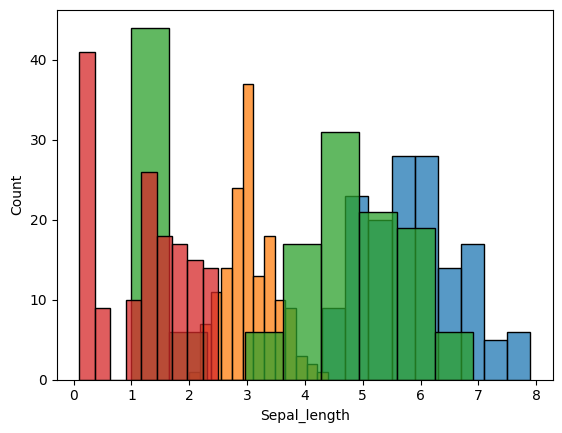

In [4]:
for col in df.columns:
    sns.histplot(df[col])

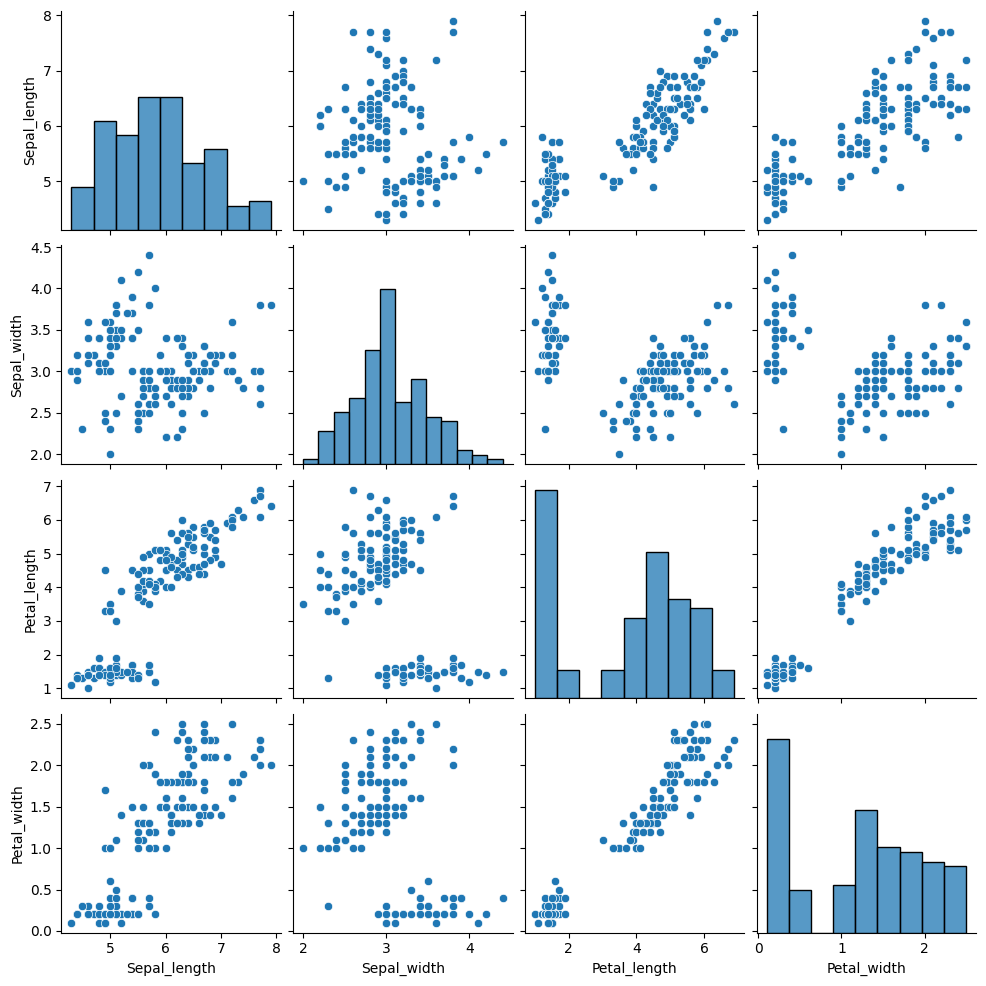

In [5]:
sns.pairplot(df)

<Axes: >

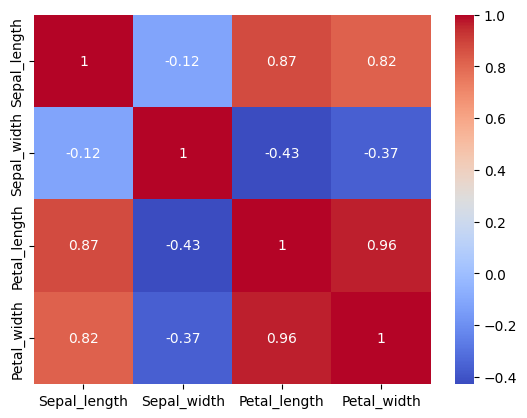

In [6]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# Elbow method to determine optimal number of clusters

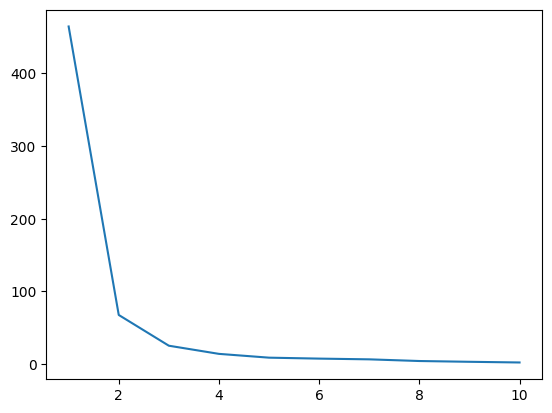

In [100]:
intertia_score=[]
for i in np.arange(1,11):
    clustering1=KMeans(n_clusters=i, n_init='auto')
    clustering1.fit_transform(df[["Petal_length"]])
    intertia_score.append(clustering1.inertia_)
plt.plot(np.arange(1,11),intertia_score)

In [101]:
clustering1=KMeans(n_clusters=3, n_init='auto')
clustering1.fit_transform(df[["Petal_length"]])
df["clustering1"]=clustering1.labels_
df["clustering1"].value_counts()

clustering1
0    58
1    50
2    42
Name: count, dtype: int64

In [90]:
df.groupby("clustering1").mean()

,Sepal_length,Sepal_width,Petal_length,Petal_width,clustering2
clustering1,,,,,
0,5.006000,3.428000,1.462000,0.246000,1.000000
1,5.911111,2.770370,4.290741,1.368519,0.111111
2,6.673913,2.991304,5.628261,2.036957,1.956522


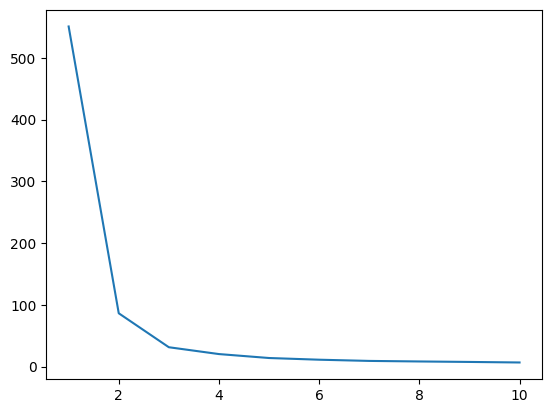

In [102]:
intertia_score_2=[]
for i in np.arange(1,11):
    clustering2=KMeans(n_clusters=i,n_init='auto')
    clustering2.fit_transform(df[["Petal_length","Petal_width"]])
    intertia_score_2.append(clustering2.inertia_)
plt.plot(np.arange(1,11),intertia_score_2)

<Axes: xlabel='Petal_length', ylabel='Petal_width'>

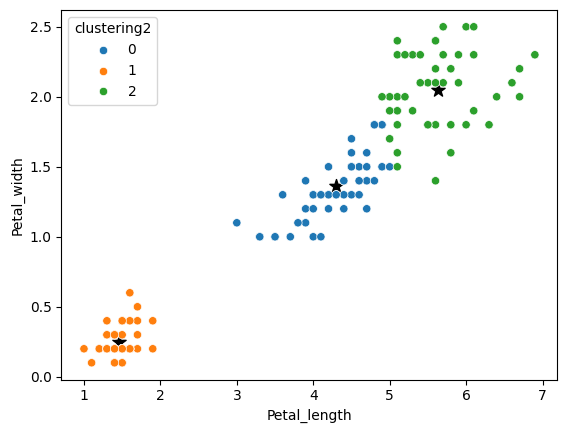

In [25]:
clustering2=KMeans(n_clusters=3,n_init='auto')
clustering2.fit_transform(df[["Petal_length","Petal_width"]])
df["clustering2"]=clustering2.labels_
df["clustering2"].value_counts()
clustering2_centers=pd.DataFrame(clustering2.cluster_centers_, columns=["x","y"])

plt.scatter(x=clustering2_centers["x"],y=clustering2_centers["y"], c="black", s=100, marker="*")
sns.scatterplot(data=df, x="Petal_length",y="Petal_width", hue="clustering2", palette="tab10")


In [26]:
df.groupby ("clustering2").mean()

,Sepal_length,Sepal_width,Petal_length,Petal_width
clustering2,,,,
0,5.918519,2.759259,4.292593,1.359259
1,5.006000,3.428000,1.462000,0.246000
2,6.665217,3.004348,5.626087,2.047826


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


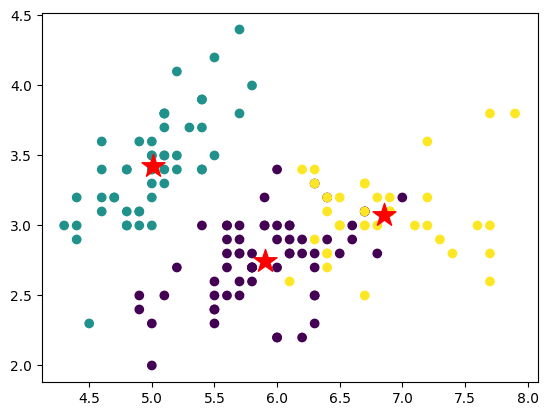

In [27]:
## use iris dataset
X=load_iris().data
Y=load_iris().target

model=KMeans(n_clusters=3, random_state=0, n_init=5)
ypred=model.fit_predict(X)
print(model.fit(X).labels_)  # ypred and.labels_ are the same
print(model.cluster_centers_)

plt.scatter(X[:,0],X[:,1], c=model.fit(X).labels_)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], marker='*', s=300, c='red');

# Silhouette score to determine optimal number of cluster

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

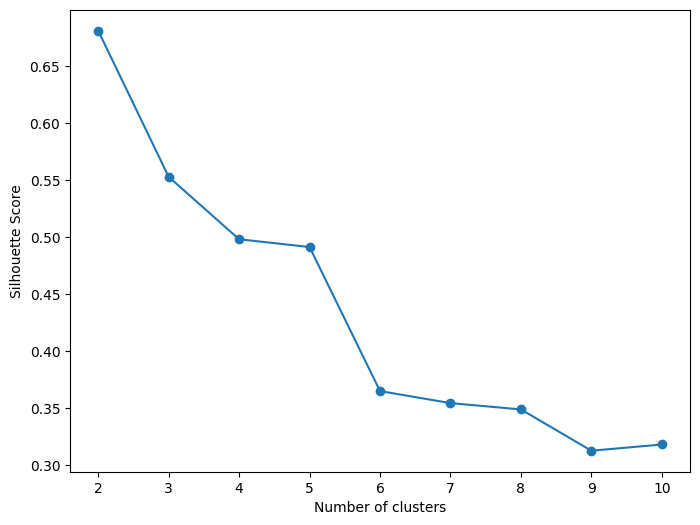

In [20]:
# List to store silhouette scores
# A high silhouette score (close to 1) means that the data points are well-clustered
silhouette_scores = []

# Range of clusters to try
cluster_range = range(2, 11)  # Silhouette score requires at least 2 clusters

# Calculate silhouette score for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


# Gap Statistic to determine optimal number of clusters

In [24]:
# Define the range of clusters to test
cluster_range = range(1, 11)

# Initialize the OptimalK instance
optimalK = OptimalK(parallel_backend='joblib')

# Calculate the optimal number of clusters using the gap statistic
n_clusters = optimalK(X, cluster_array=np.arange(1, 11))

print(f'Optimal number of clusters: {n_clusters}')


Optimal number of clusters: 10


# Dunn Index metric to evaluate the quality of clustering

In [32]:
# Function to calculate the Dunn Index
# Higher Dunn Index: Indicates better clustering with well-separated and compact clusters.
def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)

    # Calculate distances between points in clusters
    cluster_distances = []
    for label in unique_labels:
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            # Calculate the diameter (max distance within the cluster)
            d_cluster = np.max(cdist(cluster_points, cluster_points))
            cluster_distances.append(d_cluster)

    # Calculate distances between clusters
    inter_cluster_distances = []
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            dist = np.linalg.norm(X[labels == unique_labels[i]].mean(axis=0) - X[labels == unique_labels[j]].mean(axis=0))
            inter_cluster_distances.append(dist)

    # Calculate Dunn Index
    min_inter_cluster_distance = np.min(inter_cluster_distances)
    max_cluster_diameter = np.max(cluster_distances)
    
    if max_cluster_diameter == 0:
        return 0  # Prevent division by zero
    return min_inter_cluster_distance / max_cluster_diameter

# Evaluate Dunn Index for different numbers of clusters
dunn_indices = []
cluster_range = range(2, 11)  # Minimum 2 clusters for Dunn Index

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    dunn_indices.append(dunn_index(X, labels))

# Display the Dunn Index for each k
for k, dunn in zip(cluster_range, dunn_indices):
    print(f'Number of clusters: {k}, Dunn Index: {dunn}')


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Number of clusters: 2, Dunn Index: 0.8336517783170002
Number of clusters: 3, Dunn Index: 0.6711698417833859
Number of clusters: 4, Dunn Index: 0.4964211463203485
Number of clusters: 5, Dunn Index: 0.4175757427271209
Number of clusters: 6, Dunn Index: 0.4675476351993282
Number of clusters: 7, Dunn Index: 0.423232777687175
Number of clusters: 8, Dunn Index: 0.509468296405003
Number of clusters: 9, Dunn Index: 0.42726810496769835
Number of clusters: 10, Dunn Index: 0.43628119620810796


# Rand Index metric to evaluate the quality of clustering, similar to confusion matrix

In [34]:
# Evaluate Rand Index for different numbers of clusters
# The Rand Index ranges from 0 to 1, where 0 indicates no agreement and 1 indicates perfect agreement.
rand_indices = []
cluster_range = range(2, 11)  # Minimum 2 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)  # Predicted labels from K-means
    score = rand_score(Y, labels)  # Calculate Rand Index
    rand_indices.append(score)

# Display the Rand Index for each k
for k, rand in zip(cluster_range, rand_indices):
    print(f'Number of clusters: {k}, Rand Index: {rand}')

Number of clusters: 2, Rand Index: 0.763668903803132
Number of clusters: 3, Rand Index: 0.8797315436241611
Number of clusters: 4, Rand Index: 0.8539597315436241
Number of clusters: 5, Rand Index: 0.8418791946308725
Number of clusters: 6, Rand Index: 0.7846085011185683
Number of clusters: 7, Rand Index: 0.8034004474272931
Number of clusters: 8, Rand Index: 0.7921252796420581
Number of clusters: 9, Rand Index: 0.7739597315436242
Number of clusters: 10, Rand Index: 0.7733333333333333


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


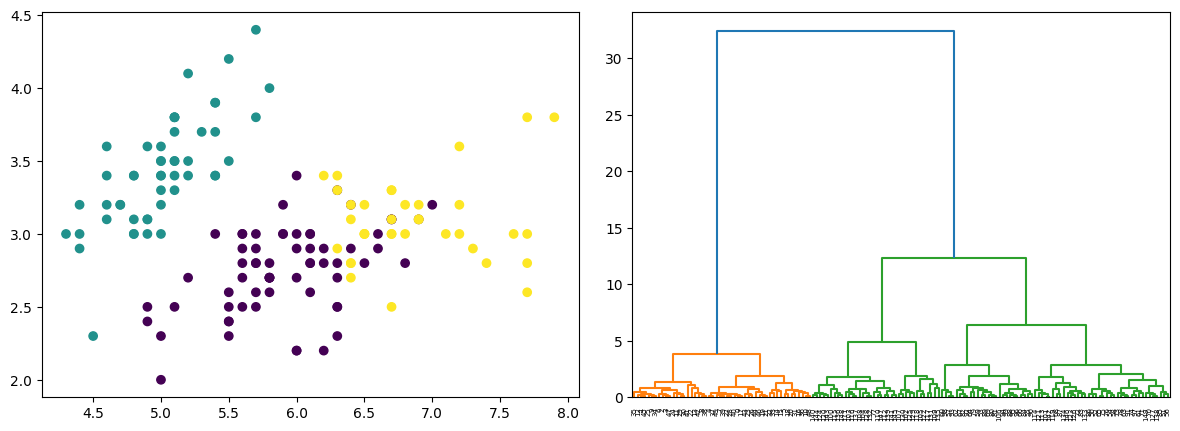

In [12]:
''' AAgglomerativeClustering 
affinity : “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”
linkage : “ward”, “complete”, “single”, “average”(default=”ward”)
'''
X=load_iris().data
Y=load_iris().target
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
ypred=cluster.fit_predict(X)


fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.subplots_adjust(left=0.06, right=1, wspace=0.1)
ax[0].scatter(X[:,0],X[:,1],c=cluster.labels_)
dendrogram(linkage(X,'ward'));

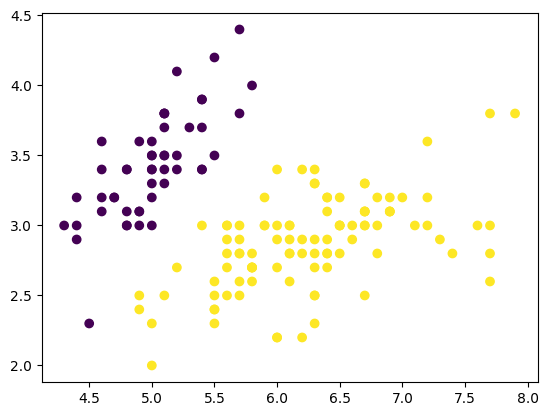

In [9]:
##DBSCAN method
X=load_iris().data
Y=load_iris().target
db = DBSCAN(eps=1,min_samples=3)
db.fit(X)
db.labels_
plt.scatter(X[:,0],X[:,1],c=db.labels_);

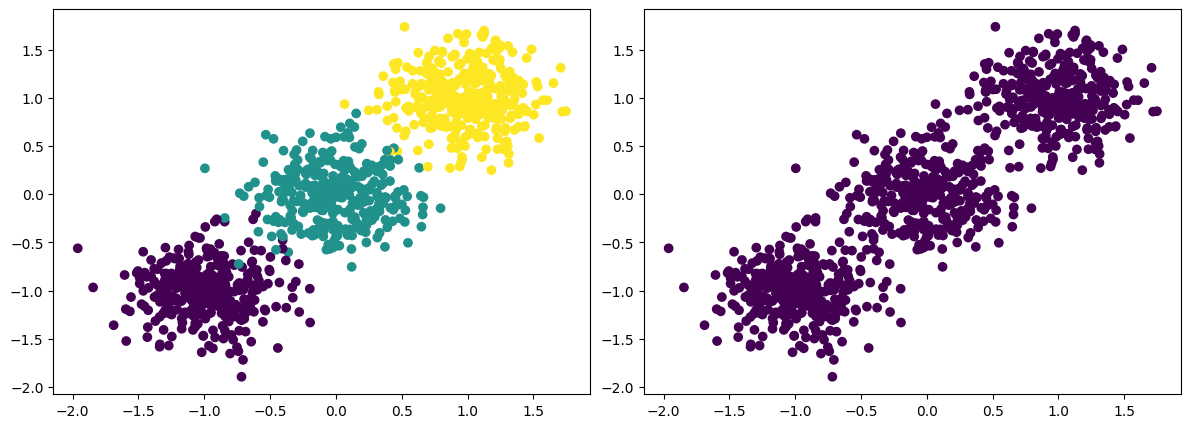

In [13]:
##make blobs
from sklearn.datasets import make_blobs
X,Y=make_blobs(n_samples=1000, centers=[[-1,-1],[0,0],[1,1]], random_state=10, cluster_std=0.3)


##DBSCAN
db=DBSCAN(eps=5,min_samples=10)
db.fit_predict(X)


##plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.subplots_adjust(left=0.06, right=1, wspace=0.1)
ax[0].scatter(X[:,0],X[:,1], c=Y)
ax[1].scatter(X[:,0],X[:,1], c=db.labels_)

# k-nearest neighbors votting algorithm

In [4]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions

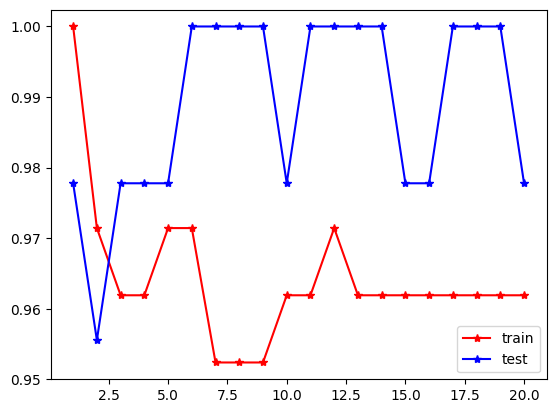

In [8]:
X=load_iris().data
Y=load_iris().target
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=10)

knn=np.arange(1,21,1)
ac_train=[]
ac_test=[]

for i in k:
    model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
    model.fit(Xtrain,Ytrain)
    ypred_train=model.predict(Xtrain)
    ypred_test=model.predict(Xtest)
    ac_train.append(accuracy_score(Ytrain,ypred_train))    
    ac_test.append(accuracy_score(Ytest,ypred_test))
    
plt.plot(knn,ac_train,c='red', marker='*',label='train')
plt.plot(knn,ac_test,c='blue', marker='*',label='test')
plt.legend()

<Axes: >

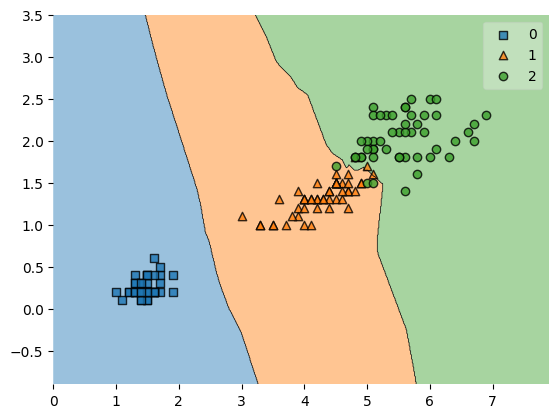

In [9]:
X=load_iris().data[:,[2,3]]
Y=load_iris().target
model=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
model.fit(X,Y)
plot_decision_regions(X,Y, clf=model)